In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib as plb
import seaborn as sns
from scipy import stats
import statistics
import dabest as db

In [14]:
p1 = pd.read_csv('D:/_2021_08_screen/S1fu/S1fuPlate1.csv')
p1s = p1.iloc[range(6)]
p1s = p1s.melt(id_vars=['Let'], var_name= 'Col', value_name= 'Compound')
p1s['CPID'] = 'P1'

In [15]:
p2 = pd.read_csv('D:/_2021_08_screen/S1fu/S1fuPlate2.csv')
p2s = p2.iloc[range(6)]
p2s = p2s.melt(id_vars=['Let'], var_name= 'Col', value_name= 'Compound')
p2s['CPID'] = 'P2'

In [16]:
ckey = pd.read_csv('D:/_2021_08_screen/S1fu/ckey.csv', index_col=0)
ckey.head()

,Let,Col,Compound,CPID,Compound Well
0,B,2,Isoamyl alcohol,P1,B2
6,B,3,"2,3-Dihydrobenzofuran",P1,B3
12,B,4,Piperitenone,P1,B4
18,B,5,Guaiazulene,P1,B5
24,B,2,Methyl palmitate,P2,B2


In [17]:
md = pd.read_csv('D:/_2021_08_screen/S1fu/S1F1_metadata.csv', delimiter=',', encoding='utf-8-sig')
md.drop(md.columns[[3, 4, 12, 13, 16, 17]], axis = 1, inplace = True)
md['CPID'] = md['Compound library ID'].str[2:4]
md.head()


,-,Recorder,Plate ID,Compound library ID,Compound Well A,Compound Well B,Compound Well C,Compound Well D,Temp (C),Humidity,Image ID,Scanner Slot:,Strain Well A,Strain Well B,Strain Well C,Strain Well D,CPID
0,10/25/2021,Ehsan,S1F1_R1_01,D1P2,B2,B3,B4,B5,NaN,NaN,S1F1_01,1,CX10,CX10,CX10,CX10,P2
1,10/25/2021,Ehsan,S1F1_R1_02,D1P2,C2,C3,C4,C5,NaN,NaN,S1F1_01,2,CX10,CX10,CX10,CX10,P2
2,10/25/2021,Ehsan,S1F1_R1_03,D1P2,D2,D3,D4,D5,NaN,NaN,S1F1_01,3,CX10,CX10,CX10,CX10,P2
3,10/25/2021,Ehsan,S1F1_R1_04,D1P2,E2,E3,E4,E5,NaN,NaN,S1F1_01,4,CX10,CX10,CX10,CX10,P2
4,10/25/2021,Ehsan,S1F1_R1_05,D1P2,F2,F3,F4,F5,NaN,NaN,S1F1_02,1,CX10,CX10,CX10,CX10,P2


In [18]:
md['Scanner Slot:'] = md['Scanner Slot:'].apply(str)

In [19]:
df_obj = md.select_dtypes(['object', 'string'])
md = md[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())
md.head()

,-,Recorder,Plate ID,Compound library ID,Compound Well A,Compound Well B,Compound Well C,Compound Well D,Image ID,Scanner Slot:,Strain Well A,Strain Well B,Strain Well C,Strain Well D,CPID
0,10/25/2021,Ehsan,S1F1_R1_01,D1P2,B2,B3,B4,B5,S1F1_01,1,CX10,CX10,CX10,CX10,P2
1,10/25/2021,Ehsan,S1F1_R1_02,D1P2,C2,C3,C4,C5,S1F1_01,2,CX10,CX10,CX10,CX10,P2
2,10/25/2021,Ehsan,S1F1_R1_03,D1P2,D2,D3,D4,D5,S1F1_01,3,CX10,CX10,CX10,CX10,P2
3,10/25/2021,Ehsan,S1F1_R1_04,D1P2,E2,E3,E4,E5,S1F1_01,4,CX10,CX10,CX10,CX10,P2
4,10/25/2021,Ehsan,S1F1_R1_05,D1P2,F2,F3,F4,F5,S1F1_02,1,CX10,CX10,CX10,CX10,P2


In [20]:
md = md.fillna('Empty')
md.tail()

,-,Recorder,Plate ID,Compound library ID,Compound Well A,Compound Well B,Compound Well C,Compound Well D,Image ID,Scanner Slot:,Strain Well A,Strain Well B,Strain Well C,Strain Well D,CPID
97,11/19/2021,EMILY,S1F1_R5_03,D5P1,D2,D3,D4,D5,S1F1_25,2,PR678,PR678,PR678,PR678,P1
98,11/19/2021,EMILY,S1F1_R5_04,D5P1,C2,C3,C4,C5,S1F1_25,3,PR678,PR678,PR678,PR678,P1
99,11/19/2021,EMILY,S1F1_R5_05,D5P1,B2,B5,Empty,Empty,S1F1_26,1,CX10,CX10,CX10,CX10,P1
100,11/19/2021,EMILY,S1F1_R5_06,D5P1,E2,Empty,Empty,Empty,S1F1_25,4,PR678,PR678,PR678,PR678,P1
101,11/22/2021,EMILY,S1F1_R6_01,D5P1,B2,B3,B4,Empty,S1F1_27,1,PR678,PR678,PR678,PR678,P1


In [21]:
def add_compoundA(row, compound_map):
    if row['Compound Well A'] != 'Empty':
        compound = compound_map.loc[
            (compound_map['CPID']==row['CPID']) & 
            (compound_map['Compound Well']==row['Compound Well A'])]['Compound']
        return compound.values[0]
    else:
        return "Empty"
    
def add_compoundB(row, compound_map ):
    if row['Compound Well B'] != 'Empty':
        compound = compound_map.loc[
            (compound_map['CPID']==row['CPID']) & 
            (compound_map['Compound Well']==row['Compound Well B'])]['Compound']
        return compound.values[0]
    else:
        return "Empty"

def add_compoundC(row, compound_map ):
    if row['Compound Well C'] != 'Empty':
        compound = compound_map.loc[
            (compound_map['CPID']==row['CPID']) & 
            (compound_map['Compound Well']==row['Compound Well C'])]['Compound']
        return compound.values[0]
    else:
        return "Empty"

def add_compoundD(row, compound_map ):
    if row['Compound Well D'] != 'Empty':
        compound = compound_map.loc[
            (compound_map['CPID']==row['CPID']) & 
            (compound_map['Compound Well']==row['Compound Well D'])]['Compound']
        return compound.values[0]
    else:
        return "Empty"


In [22]:
md['Compound A'] = md.apply(
    lambda row: add_compoundA(row, ckey), axis=1)

In [23]:
md['Compound B'] = md.apply(
    lambda row: add_compoundB(row, ckey), axis=1)
    
md['Compound C'] = md.apply(
    lambda row: add_compoundC(row, ckey), axis=1)
    
md['Compound D'] = md.apply(
    lambda row: add_compoundD(row, ckey), axis=1)

In [24]:
md['Image ID'] = md['Image ID'].str[:5] + '0' + md['Image ID'].str[5:8]
#md = md.rename(columns = {'test': 'IMID'})
md['Image ID']

0      S1F1_001
1      S1F1_001
2      S1F1_001
3      S1F1_001
4      S1F1_002
         ...   
97     S1F1_025
98     S1F1_025
99     S1F1_026
100    S1F1_025
101    S1F1_027
Name: Image ID, Length: 102, dtype: object

In [25]:
ia_results = pd.read_csv('D:/_2021_08_screen/S1fu/124_ia/S1F1.csv', index_col=0).drop(columns=['Large Object'])

In [26]:
broll = ['S1F1_b010', 'S1F1_b011', 'S1F1_b012']
ia_results= ia_results[~ia_results['File Name'].isin(broll)]
ia_results.head()

,WellNo,Total Worms,Chemotaxis,Compound,Strain,File Name,Well width,Plate ID
0,1A,116.0,-0.092784,NaN,NaN,S1F1_001,3044.0,NaN
1,1B,199.0,0.233533,NaN,NaN,S1F1_001,3044.0,NaN
2,1C,306.0,0.225352,NaN,NaN,S1F1_001,3044.0,NaN
3,1D,208.0,0.390374,NaN,NaN,S1F1_001,3057.0,NaN
4,2A,282.0,-0.019920,NaN,NaN,S1F1_001,3057.0,NaN


In [27]:
def add_PlateID(row, metadata):
    slotID = row['WellNo'][0]
    pid = metadata.loc[
        (metadata['Image ID']==row['File Name']) & 
        (metadata['Scanner Slot:']==slotID)]['Plate ID']
    #if len(pid) == 0:
    #    print(row['File Name'])
    #print(pid)
    return pid.values[0]

ia_results['Plate ID'] = ia_results.apply(
    lambda row: add_PlateID(row, md), axis=1)

ia_results.head()

,WellNo,Total Worms,Chemotaxis,Compound,Strain,File Name,Well width,Plate ID
0,1A,116.0,-0.092784,NaN,NaN,S1F1_001,3044.0,S1F1_R1_01
1,1B,199.0,0.233533,NaN,NaN,S1F1_001,3044.0,S1F1_R1_01
2,1C,306.0,0.225352,NaN,NaN,S1F1_001,3044.0,S1F1_R1_01
3,1D,208.0,0.390374,NaN,NaN,S1F1_001,3057.0,S1F1_R1_01
4,2A,282.0,-0.019920,NaN,NaN,S1F1_001,3057.0,S1F1_R1_02


In [28]:
ia = pd.read_csv('D:/_2021_08_screen/S1fu/ub_md.csv', index_col=0)
ia.head()

,-,Recorder,Plate ID,Compound library ID,Compound Well A,Compound Well B,Compound Well C,Compound Well D,Image ID,Scanner Slot:,Strain Well A,Strain Well B,Strain Well C,Strain Well D,CPID,Compound A,Compound B,Compound C,Compound D
0,10/25/2021,Ehsan,S1F1_R1_01,D1P2,B2,B3,B4,B5,S1F1_001,1,CX10,CX10,CX10,CX10,P2,Methyl palmitate,Carnosol,Limonin,H2O
1,10/25/2021,Ehsan,S1F1_R1_02,D1P2,C2,C3,C4,C5,S1F1_001,2,CX10,CX10,CX10,CX10,P2,Isoquinoline,2-Nonylquinolin-4(1H)-one,Lapachol,Acetophenone
2,10/25/2021,Ehsan,S1F1_R1_03,D1P2,D2,D3,D4,D5,S1F1_001,3,CX10,CX10,CX10,CX10,P2,1-octanol,Furfural,Camphor,Thiophene
3,10/25/2021,Ehsan,S1F1_R1_04,D1P2,E2,E3,E4,E5,S1F1_001,4,CX10,CX10,CX10,CX10,P2,Solasodine,Salvinorin A Propionate,Sinomenine hydrochloride,Diacetyl
4,10/25/2021,Ehsan,S1F1_R1_05,D1P2,F2,F3,F4,F5,S1F1_002,1,CX10,CX10,CX10,CX10,P2,"2,5-Dihydroxybenzoic acid",DMSO,Coumaran,p-Tolualdehyde


In [29]:
def add_Compound(row, metadata):
    wellID = row['WellNo'][1]

    if wellID == 'A':
        compound = metadata.loc[metadata['Plate ID']==row['Plate ID']]['Compound A']
    elif wellID == 'B':
        compound = metadata.loc[metadata['Plate ID']==row['Plate ID']]['Compound B']
    elif wellID == 'C':
        compound = metadata.loc[metadata['Plate ID']==row['Plate ID']]['Compound C']
    elif wellID == 'D':
        compound = metadata.loc[metadata['Plate ID']==row['Plate ID']]['Compound D']
    #print(compound)
    return compound.values[0]

ia_results['Compound'] = ia_results.apply(
    lambda row: add_Compound(row, ia), axis=1)



In [30]:
def add_Strain(row, metadata):
    slotID = int(row['WellNo'][0])
    strain = metadata.loc[
        (metadata['Plate ID']==row['Plate ID']) & 
        (metadata['Scanner Slot:']==slotID)]['Strain Well A ']
    if len(strain) == 0:
        return 'Empty'
    else:
        return strain.values[0]

ia_results['Strain'] = ia_results.apply(
    lambda row: add_Strain(row, ia), axis=1)


In [31]:
filtered = ia_results.loc[ia_results['Total Worms'] >= 150]
print(len(filtered))

344


In [32]:
filtered = filtered.loc[filtered['Compound'] != 'Empty']

In [33]:
print(len(filtered))

314


In [34]:
filtered.to_csv('D:/_2021_08_screen/S1fu/ubf_ia.csv')

In [35]:
worm_locs_foldr = plb.Path('D:/_2021_08_screen/S1fu/124_ia/')

In [44]:
# 1 inch = 25.4mm
mm = 25.4
# 1200 pixels per 25.4mm
px_mm = 1200/mm

#The following transforms the worm location data so that it is respective to the start zone
# The start zone is at the center of the image; Start Zone = 0mm
#Worms with positive values are closer to the compound, negative values are away from the compound


In [46]:
def get_worm_locs(row, wrms, result_dict, strain): 

    fname = row['File Name']
    wellnum = row['WellNo']

    if row['Strain'] == strain:
        loc_fname =  wrms.joinpath('loc_' + fname + '_' + wellnum + '.csv')
        temp = pd.read_csv(loc_fname)
        compound = row['Compound']
        xs = temp['X']
        #xs = list(temp['centroid-1'])
        if compound in result_dict:
            result_dict[compound] = result_dict[compound].append(xs)
            result_dict[compound].reset_index(inplace=True, drop=True)
            #result_dict[compound] = result_dict[compound]+xs
        else:
            result_dict[compound]=xs

    return result_dict

# Need to create an empty dictionary to hold the values
results_dict = {}
for index, row in filtered.iterrows():
    PR_pooled = get_worm_locs(row, worm_locs_foldr, results_dict, 'PR678')
PR_pooled_df = pd.DataFrame.from_dict(PR_pooled)
PRmm_df = PR_pooled_df.apply(lambda x: -(x/px_mm)+32.5)


In [45]:
# Need to create an empty dictionary to hold the values
results_dict = {}
for index, row in filtered.iterrows():
    CX_pooled = get_worm_locs(row, worm_locs_foldr, results_dict, 'CX10')
CX_pooled_df = pd.DataFrame.from_dict(CX_pooled)
CXmm_df = CX_pooled_df.apply(lambda x: -(x/px_mm)+32.5)


In [3]:
#PRmm_df.to_csv('D:/_2021_08_screen/S1fu/150_PR678.csv')
#CXmm_df.to_csv('D:/_2021_08_screen/S1fu/150_CX10.csv')

PRmm_df = pd.read_csv('D:/_2021_08_screen/S1fu/allReps_over150/150_PR678.csv', index_col=0)
CXmm_df = pd.read_csv('D:/_2021_08_screen/S1fu/allReps_over150/150_CX10.csv', index_col=0)

In [67]:
#mm_df.to_csv('D:/_2021_08_screen/S1fu/CX10_mm.csv')

In [4]:
cols = list(CXmm_df.columns)
cols.insert(0, cols.pop(cols.index('DMSO')))
print(cols)

['DMSO', 'Carnosol', 'Limonin', 'H2O', 'Isoquinoline', '2-Nonylquinolin-4(1H)-one', 'Lapachol', 'Acetophenone', '1-octanol', 'Furfural', 'Camphor', 'Thiophene', 'Solasodine', 'Salvinorin A Propionate', 'Sinomenine hydrochloride', 'Diacetyl', '2,5-Dihydroxybenzoic acid', 'Coumaran', 'p-Tolualdehyde', 'Isoamyl alcohol', '2,3-Dihydrobenzofuran', 'Piperitenone', 'Guaiazulene', 'Oleanolic Acid', 'Sabinene', 'Spinosad', 'L-Mimosine', 'Phenylacetylene', 'Rosmarinic acid', '2-nonanone', 'Daucosterol', 'Leonurine', 'Cinnamyl Alcohol', '(-)-Huperzine A', '2-Methyl-1-butanol', 'Paeoniflorin', 'Ursolic acid', 'Ethyl palmitate', 'Piperonyl Alcohol', 'Anisole', 'α-Phellandrene', 'Ethyl p-methoxycinnamate', 'Phytol', 'Methyl palmitate', 'Ellagic acid']


In [49]:
cx10_mm_obj = db.load(CXmm_df, idx=(cols))
cx10_df_mm =cx10_mm_obj.mean_diff.results
cx10_df_mm.to_csv('D:/_2021_08_screen/S1fu/150_CX10_meandif.csv')

In [50]:
pr678_mm_obj = db.load(PRmm_df, idx=(cols))
pr678_df_mm = pr678_mm_obj.mean_diff.results
pr678_df_mm.to_csv('D:/_2021_08_screen/S1fu/150_PR678_meandif.csv')

In [5]:
def mean_diff_calc(df, ref):
    cols = list(df.columns)
    cols.insert(0, cols.pop(cols.index(ref)))
    db_obj = db.load(df, idx=(cols))
    results_df = db_obj.mean_diff.results
    return results_df

In [12]:
refs = ['DMSO', 'H2O', 'Diacetyl', 'Isoamyl alcohol', '1-octanol', '2-nonanone']
cx10_all_refs = pd.DataFrame()
for r in refs:
    mdiff = mean_diff_calc(CXmm_df, r)
    cx10_all_refs = cx10_all_refs.append(mdiff)
cx10_all_refs.to_csv('D:/_2021_08_screen/S1fu/cx10_allrefs.csv')


In [11]:
PR678_all_refs = pd.DataFrame()
for r in refs:
    mdiff = mean_diff_calc(PRmm_df, r)
    PR678_all_refs = PR678_all_refs.append(mdiff)
PR678_all_refs.to_csv('D:/_2021_08_screen/S1fu/PR678_allrefs.csv')

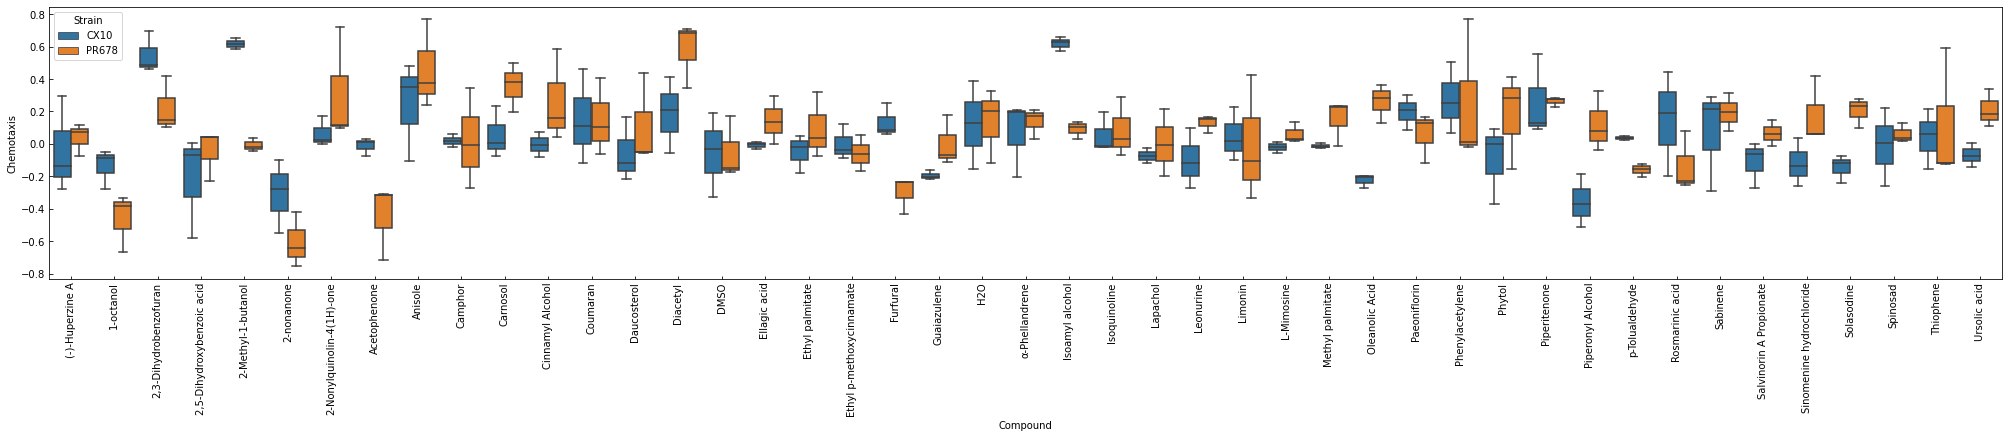

In [161]:
fig, ax = fig, ax = plt.subplots(figsize=(35,5))
sns.boxplot(data=filtered, x='Compound', y='Chemotaxis', hue='Strain', ax=ax )
ax.tick_params(axis='x', labelrotation=90, direction='in')
ax.tick_params(axis='y', direction='in')
#fig.savefig('D:/_2021_08_screen/S1fu/all_comps.png', dpi=300)

In [78]:

pr_ref_df = pr678_df_mm[pr678_df_mm['test'].isin(refs)]

pr_ref_df['test'] = pd.Categorical(pr_ref_df['test'], refs)
pr_ref_df

C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,...,resamples,random_seed,pvalue_permutation,permutation_count,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
1,DMSO,1-octanol,851,668,mean difference,False,-3.953032,95,-5.293354,-2.707069,...,5000,12345,0.0,5000,1.940105e-09,6.040730,2.570381e-09,5.992922,4.766293e-09,333919.0
5,DMSO,2-nonanone,851,767,mean difference,False,-6.325735,95,-7.514221,-5.133704,...,5000,12345,0.0,5000,1.467615e-24,10.398968,3.142214e-24,10.321014,9.336639e-23,418501.0
14,DMSO,Diacetyl,851,710,mean difference,False,9.447680,95,8.162622,10.738549,...,5000,12345,0.0,5000,1.732651e-44,-14.455560,2.883483e-44,-14.406118,2.001945e-41,182543.0
20,DMSO,H2O,851,523,mean difference,False,3.815697,95,2.391063,5.156433,...,5000,12345,0.0,5000,7.866413e-08,-5.405207,1.104554e-07,-5.336983,1.030748e-06,187646.0
22,DMSO,Isoamyl alcohol,851,889,mean difference,False,3.360917,95,2.089409,4.599195,...,5000,12345,0.0,5000,1.156460e-07,-5.322538,1.161310e-07,-5.321735,5.691992e-07,325871.0


In [79]:
cx_ref_df = cx10_df_mm[cx10_df_mm['test'].isin(refs)]

cx_ref_df['test'] = pd.Categorical(cx_ref_df['test'], refs)
cx_ref_df

C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,...,resamples,random_seed,pvalue_permutation,permutation_count,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
1,DMSO,1-octanol,936,806,mean difference,False,-1.173355,95,-2.655425,0.347436,...,5000,12345,0.1274,5000,1.266346e-01,1.528241,1.297979e-01,1.515617,2.396278e-01,389518.0
5,DMSO,2-nonanone,936,861,mean difference,False,-3.744640,95,-5.228813,-2.159922,...,5000,12345,0.0000,5000,1.834243e-06,4.786742,1.908140e-06,4.778675,2.985983e-06,454285.0
14,DMSO,Diacetyl,936,861,mean difference,False,3.997838,95,2.467943,5.489077,...,5000,12345,0.0000,5000,4.239087e-07,-5.076741,4.366735e-07,-5.070958,5.360118e-07,347862.0
20,DMSO,H2O,936,909,mean difference,False,2.071254,95,0.553972,3.540891,...,5000,12345,0.0078,5000,6.312916e-03,-2.734214,6.373819e-03,-2.731031,5.258723e-03,393484.0
22,DMSO,Isoamyl alcohol,936,711,mean difference,False,11.387340,95,9.915606,12.882325,...,5000,12345,0.0000,5000,5.840411e-49,-15.207184,2.482915e-46,-14.748838,1.347746e-41,203582.0


In [80]:
combined = pr_ref_df.append(cx_ref_df)
combined

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,...,resamples,random_seed,pvalue_permutation,permutation_count,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
1,DMSO,1-octanol,851,668,mean difference,False,-3.953032,95,-5.293354,-2.707069,...,5000,12345,0.0000,5000,1.940105e-09,6.040730,2.570381e-09,5.992922,4.766293e-09,333919.0
5,DMSO,2-nonanone,851,767,mean difference,False,-6.325735,95,-7.514221,-5.133704,...,5000,12345,0.0000,5000,1.467615e-24,10.398968,3.142214e-24,10.321014,9.336639e-23,418501.0
14,DMSO,Diacetyl,851,710,mean difference,False,9.447680,95,8.162622,10.738549,...,5000,12345,0.0000,5000,1.732651e-44,-14.455560,2.883483e-44,-14.406118,2.001945e-41,182543.0
20,DMSO,H2O,851,523,mean difference,False,3.815697,95,2.391063,5.156433,...,5000,12345,0.0000,5000,7.866413e-08,-5.405207,1.104554e-07,-5.336983,1.030748e-06,187646.0
22,DMSO,Isoamyl alcohol,851,889,mean difference,False,3.360917,95,2.089409,4.599195,...,5000,12345,0.0000,5000,1.156460e-07,-5.322538,1.161310e-07,-5.321735,5.691992e-07,325871.0
1,DMSO,1-octanol,936,806,mean difference,False,-1.173355,95,-2.655425,0.347436,...,5000,12345,0.1274,5000,1.266346e-01,1.528241,1.297979e-01,1.515617,2.396278e-01,389518.0
5,DMSO,2-nonanone,936,861,mean difference,False,-3.744640,95,-5.228813,-2.159922,...,5000,12345,0.0000,5000,1.834243e-06,4.786742,1.908140e-06,4.778675,2.985983e-06,454285.0
14,DMSO,Diacetyl,936,861,mean difference,False,3.997838,95,2.467943,5.489077,...,5000,12345,0.0000,5000,4.239087e-07,-5.076741,4.366735e-07,-5.070958,5.360118e-07,347862.0
20,DMSO,H2O,936,909,mean difference,False,2.071254,95,0.553972,3.540891,...,5000,12345,0.0078,5000,6.312916e-03,-2.734214,6.373819e-03,-2.731031,5.258723e-03,393484.0
22,DMSO,Isoamyl alcohol,936,711,mean difference,False,11.387340,95,9.915606,12.882325,...,5000,12345,0.0000,5000,5.840411e-49,-15.207184,2.482915e-46,-14.748838,1.347746e-41,203582.0


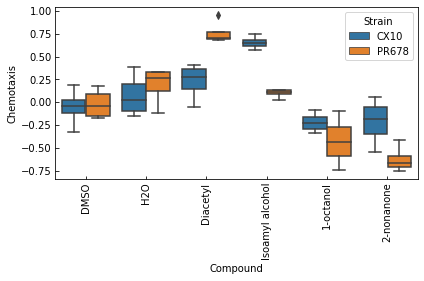

In [47]:
fig, ax = plt.subplots()
sns.boxplot(data=ref_df, x='Compound', y='Chemotaxis', hue='Strain', ax=ax )
ax.tick_params(axis='x', labelrotation=90, direction='in')
ax.tick_params(axis='y',direction='in')
fig.tight_layout()
fig.savefig('D:/_2021_08_screen/S1fu/ref_box.png', dpi = 300)